## PCA for Data Visualization

For a lot of machine learning applications it helps to be able to visualize your data. 
Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. 
You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

In [1]:
#Load the Iris Dataset.
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Standardization of the Data
Using **StandardScaler** to ensure the scale of features in our Dataset doesn't affect PCA. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. Read More: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width', 'petal length', 'petal width']

# Split up the Input Variables
X = df.loc[:, features].values

# Split up the Target Variables
y = df.loc[:, ['target']].values

# Standardization Process
X = StandardScaler().fit_transform(X)

* For Clarity of what we are trying to achieve
![](img/Petal-sepal.jpg)

The original dataset had 4 columns, we need to reduce that to Two(2). After this we'll have Two dimensions of variation.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

pcaDF = pd.DataFrame(data = principalComponents, columns= ['PC 1', 'PC 2'])
print("After PCA and Keeping the Top 2 Principal Components")
pcaDF.head()

After PCA and Keeping the Top 2 Principal Components


,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [9]:
finalDF = pd.concat([pcaDF, df[['target']]], axis = 1)
finalDF.head()

,PC 1,PC 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualizing the 2D Projection
Let's observe how well the classes are separated.

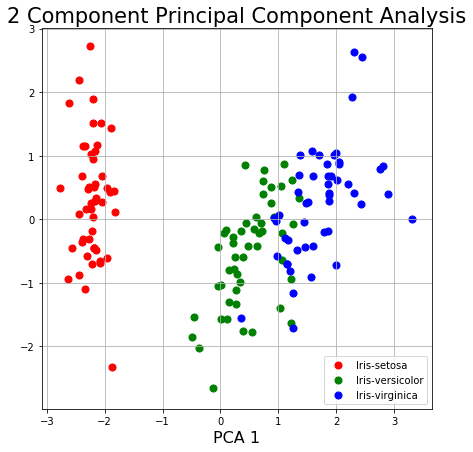

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA 1', fontsize = 16)
ax.set_xlabel('PCA 1', fontsize = 16)
ax.set_title('2 Component Principal Component Analysis', fontsize = 21)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToRetain = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToRetain, 'PC 1'], finalDF.loc[indicesToRetain, 'PC 2'], c = color, s = 50)

ax.legend(targets)
ax.grid()